In [2]:
!pip install seaborn


     -------------------------------------- 294.9/294.9 KB 1.4 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install tqdm


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
!pip install scikit-image


     ---------------------------------------- 12.8/12.8 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 315.8/315.8 KB 3.9 MB/s eta 0:00:00
     -------------------------------------- 226.8/226.8 KB 2.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint


# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from keras.applications.resnet50 import ResNet50
import pathlib
import re
import shutil
from numpy import ndarray

import random
import skimage as sk
from skimage import io
from skimage.util import img_as_ubyte
from sklearn.metrics import classification_report

In [12]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint


# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from keras.applications.resnet50 import ResNet50
import pathlib
import re
import shutil
from numpy import ndarray
import random
import skimage as sk
from skimage import io
from skimage.util import img_as_ubyte
from sklearn.metrics import classification_report

In [ ]:
IMG_SIZE = 256
data_dir = r"C:\Users\devar\Downloads\archive (6)\Fire-Detection-images-images"
data_dir = pathlib.Path(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

image_count = len(list(data_dir.glob('*/*.jpg'))) + len(list(data_dir.glob('*/*.JPG'))) + len(list(data_dir.glob('*/*.png')))  + len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

[]
0


[]
[]


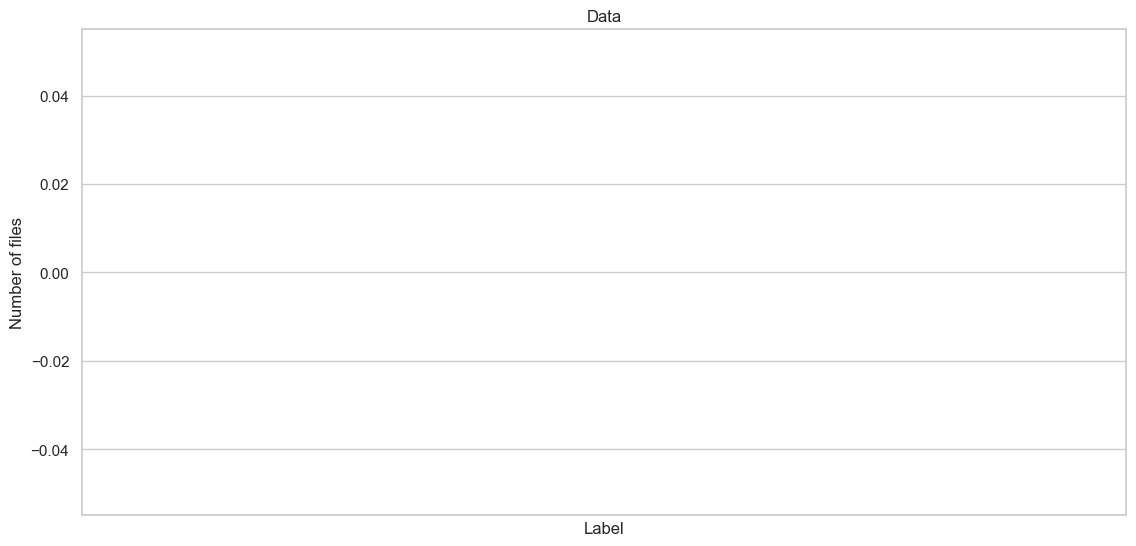

In [16]:
f = [item_num for item_num in data_dir.rglob('*')] 
values, counts = np.unique([x.parent for x in f ], return_counts=True)
#print(list(zip(counts, values)))
x_name = tuple(class_names) 
y_pos = np.arange(len(x_name))
x_value = list(counts)
print(x_value)
if x_value:
    x_value.pop(0)

print(x_value)
plt.subplots(figsize=(12,6))
bars = plt.bar(y_pos, x_value, align='center', alpha=1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, yval, ha='center', va='bottom')
plt.xticks(y_pos, x_name)
plt.xlabel('Label')
plt.ylabel('Number of files')
plt.title('Data')
plt.show()

In [5]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X_train.append(np.array(img))
        Z_train.append(str(label))

X_train=[]
Z_train=[]

NOTFIRE=r'C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\0'
FIRE=r'C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\1'

make_train_data('NOTFIRE',NOTFIRE)
make_train_data('FIRE',FIRE)

np.shape(X_train)
np.save(r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\X_train.npy",X_train)

le=LabelEncoder()
Y_train=le.fit_transform(Z_train)
Y_train=to_categorical(Y_train,2)
#print(Y_train)

X_train=np.load(r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\X_train.npy")
X_train=np.array(X_train)
#x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.3,random_state=42)

NameError: name 'tqdm' is not defined

In [ ]:
def make_val_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X_val.append(np.array(img))
        Z_val.append(str(label))

X_val=[]
Z_val=[]

NOTFIRE=r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\0"
FIRE=r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\1"

make_val_data('NOTFIRE',NOTFIRE)
make_val_data('FIRE',FIRE)

np.shape(X_val)
np.save(r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\X_val.npy",X_val)
le=LabelEncoder()
Y_val=le.fit_transform(Z_val)
Y_val=to_categorical(Y_val,2)
#print(Y_val)fire

X_val=np.load(r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\X_val.npy")
X_val=np.array(X_val)

NameError: name 'tqdm' is not defined

In [ ]:
def make_test_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X_test.append(np.array(img))
        Z_test.append(str(label))

X_test=[]
Z_test=[]

NOTFIRE=r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\0"
FIRE=r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\1"

make_test_data('NOTFIRE',NOTFIRE)
make_test_data('FIRE',FIRE)

np.shape(X_test)
np.save(r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\X_test.npy",X_test)
le=LabelEncoder()
Y_test=le.fit_transform(Z_test)
Y_test=to_categorical(Y_test,2)
#print(Y_test)

X_test=np.load(r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\X_test.npy")
X_test=np.array(X_test)

NameError: name 'tqdm' is not defined

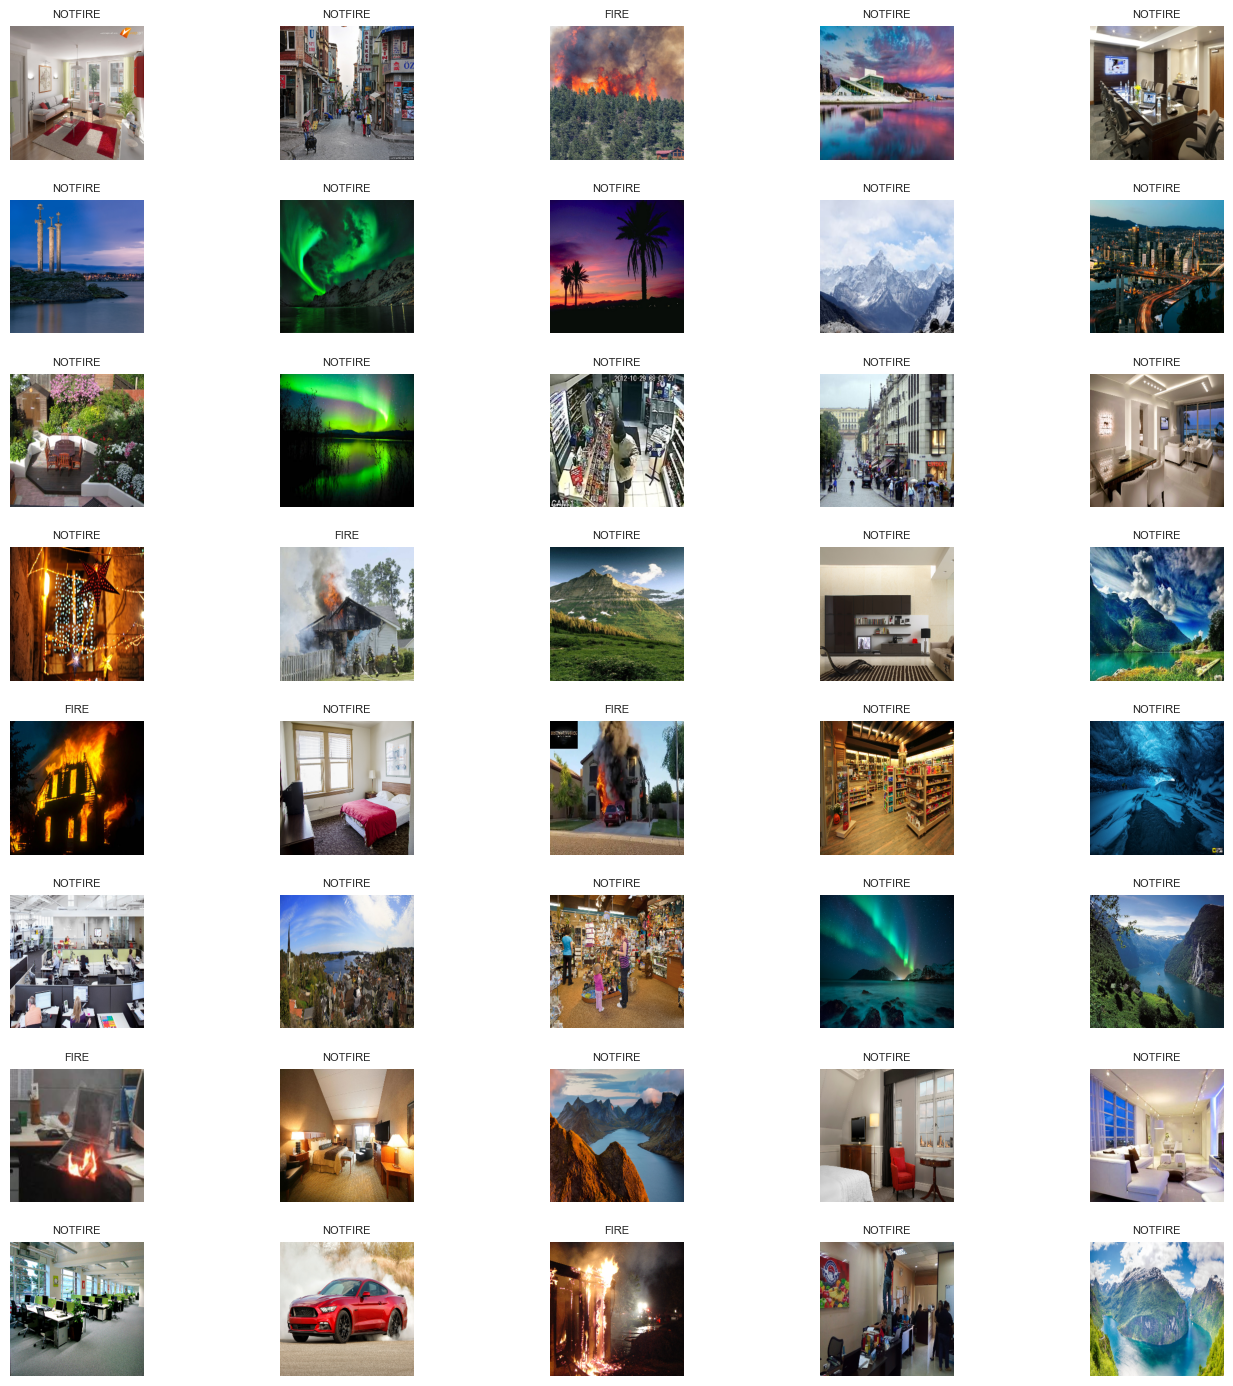

In [22]:
fig, ax = plt.subplots(8, 5)  # 8 rows, 5 columns = 40 images
fig.subplots_adjust(bottom=0.05, top=0.95, hspace=0.3)
fig.set_size_inches(15, 15)

for i in range(8):  # rows
    for j in range(5):  # columns
        l = rn.randint(0, len(Z_train) - 1)
        ax[i, j].grid(False)
        ax[i, j].imshow(X_train[l][:, :, ::-1])  # Convert BGR to RGB if needed
        ax[i, j].set_title(str(Z_train[l]), fontsize=8)
        ax[i, j].axis('off')

plt.show()


In [23]:
base_model=ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_SIZE,IMG_SIZE,3), pooling='max')
#base_model=ResNet50(include_top=False, weights=None,input_shape=(224,224,3), pooling='max')
#base_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step


In [24]:
model=Sequential()
model.add(base_model)
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [25]:
epochs=20
batch_size=64

base_model.trainable=False

model.compile(optimizer=Adam(learning_rate=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,408,066 (116.00 MB)

 Trainable params: 6,820,354 (26.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [26]:
History = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val,Y_val))

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 146s 6s/step - accuracy: 0.5623 - loss: 2.7018 - val_accuracy: 0.8848 - val_loss: 0.3006
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.9036 - loss: 0.2664 - val_accuracy: 0.9416 - val_loss: 0.1750
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.9531 - loss: 0.1232 - val_accuracy: 0.9631 - val_loss: 0.0992
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.9763 - loss: 0.0653 - val_accuracy: 0.9908 - val_loss: 0.0398
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.9958 - loss: 0.0243 - val_accuracy: 0.9954 - val_loss: 0.0229
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.9982 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 1.0000 - v

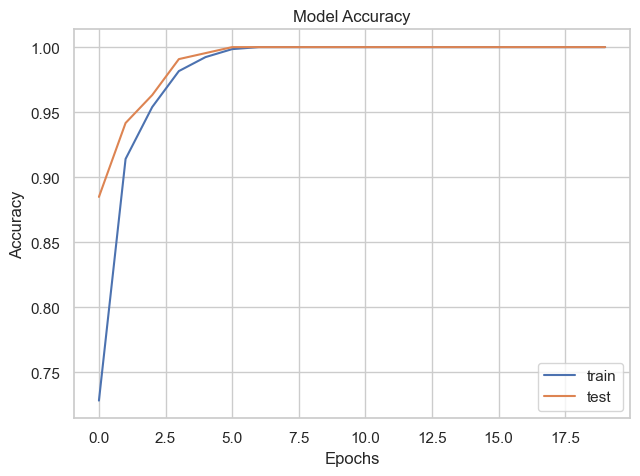

In [28]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

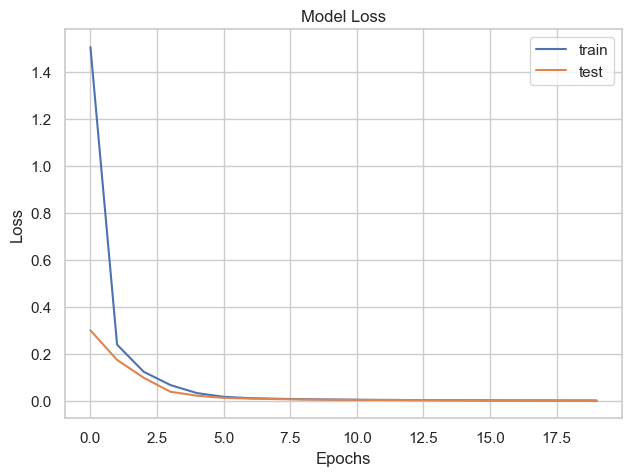

In [29]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [30]:
y_predict=model.predict(X_test)
y_predict=np.argmax(y_predict, axis=1)
y_true=np.argmax(Y_test, axis=1)
print(classification_report(y_true, y_predict, labels=[0,1]))

21/21 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       541

    accuracy                           1.00       651
   macro avg       1.00      1.00      1.00       651
weighted avg       1.00      1.00      1.00       651



In [ ]:
img_path = r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images-images\1\96.jpg"  # Replace with the path of your single image
img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read the image
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize it to the same size as your training images


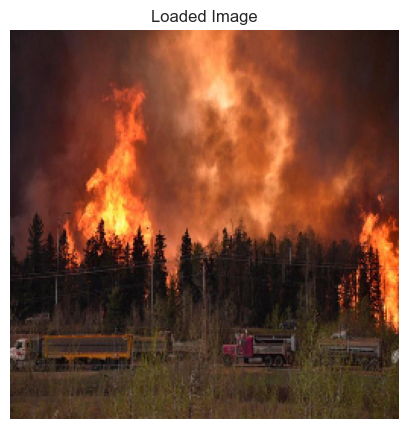

In [ ]:
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 256  # Size to which you want to resize your image

# Path to your image
img_path =r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images-images\1\96.jpg"  # Replace with your actual image path

# Read the image
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found.")
else:
    # Resize it to the same size as your training images
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # Convert BGR to RGB (since OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.title("Loaded Image successfully")
    plt.axis("off")  # Hide the axis
    plt.show()


In [3]:
model.save(r'C:\Users\Abdul Raqeeb\major_p\frontend rafi\firelp.keras')


In [43]:
# Get prediction probability
fire_prob = prediction[0][0]  # Adjust index if multi-class

print(f"Fire Probability: {fire_prob:.4f}")

# Set a threshold (adjustable based on performance)
threshold = 0.6  # Experiment with values like 0.5, 0.7, etc.
label = "Fire" if fire_prob >= threshold else "Not Fire"


Fire Probability: 0.5994


In [44]:
print("Raw Prediction Output:", prediction)


Raw Prediction Output: [[0.59941065 0.40058938]]


In [45]:
threshold = 0.6
label = "Fire" if fire_prob >= threshold else "Not Fire"


In [46]:
# Ensure proper normalization
img_array = img_rgb.astype('float32') / 255.0


In [ ]:
import os

img_folder = r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images-images\0"
for file_name in os.listdir(img_folder):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(img_folder, file_name)
        print(f"Processing: {file_name}")

        img = cv2.imread(img_path)
        if img is None:
            print(f"❌ Could not load {file_name}")
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.expand_dims(img_rgb / 255.0, axis=0)

        prediction = model.predict(img_array)
        no_fire_prob = prediction[0][0]
        fire_prob = prediction[0][1]

        print(f"🚫 No Fire Probability: {no_fire_prob:.4f}")
        print(f"🔥 Fire Probability: {fire_prob:.4f}")
        print("-" * 30)


Processing: 1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
🚫 No Fire Probability: 0.5419
🔥 Fire Probability: 0.4581
------------------------------
Processing: 10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
🚫 No Fire Probability: 0.7052
🔥 Fire Probability: 0.2948
------------------------------
Processing: 100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
🚫 No Fire Probability: 0.5109
🔥 Fire Probability: 0.4891
------------------------------
Processing: 101.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
🚫 No Fire Probability: 0.5610
🔥 Fire Probability: 0.4390
------------------------------
Processing: 102.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
🚫 No Fire Probability: 0.5865
🔥 Fire Probability: 0.4135
------------------------------
Processing: 103.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
🚫 No Fire Probability: 0.5460
🔥 Fire Probability: 0.4540
------------------------------
Processing: 104.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
🚫 No Fire Probability: 0.5549
🔥 Fire Probability: 0.4451
-----

Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Raw Fire Probability: 0.5065


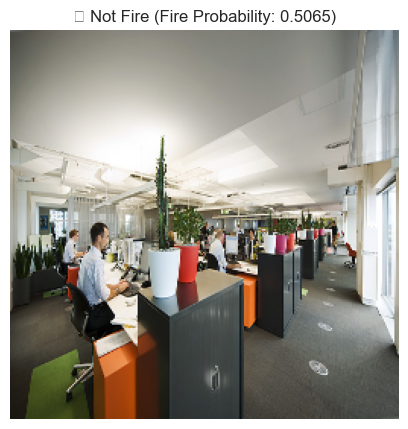

Final Prediction: ✅ Not Fire (Fire Probability: 0.5065)


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

IMG_SIZE = 256
model_path = r'C:\Users\Abdul Raqeeb\major_p\frontend rafi\firelp.keras'
img_path = r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\0\9.jpg"
# Load model
model = load_model(model_path)
print("Model loaded successfully.")

# Read and process image
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
if img is None:
    print("Error: Image not found.")
    exit()

img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = np.expand_dims(img_rgb / 255.0, axis=0)

# Predict
prediction = model.predict(img_array)
fire_prob = prediction[0][1]  # Fire class probability

# Print probability for analysis
print(f"Raw Fire Probability: {fire_prob:.4f}")

# Adjust threshold-based classification
if fire_prob < 0.56:
    label = "✅ Not Fire"
elif fire_prob > 0.56:
    label = "🔥 Fire Detected"
else:
    label = "❓ Uncertain Classification"

# Show result
plt.imshow(img_rgb)
plt.title(f"{label} (Fire Probability: {fire_prob:.4f})")
plt.axis("off")
plt.show()

print(f"Final Prediction: {label} (Fire Probability: {fire_prob:.4f})")


✅ Model loaded successfully.

1.jpg: 🔥 Fire Probability = 0.3699
10.jpg: 🔥 Fire Probability = 0.4340
100.jpg: 🔥 Fire Probability = 0.4429
101.jpg: 🔥 Fire Probability = 0.4212
102.jpg: 🔥 Fire Probability = 0.3918
103.jpg: 🔥 Fire Probability = 0.4341
104.jpg: 🔥 Fire Probability = 0.3708
105.png: 🔥 Fire Probability = 0.3598
106.jpg: 🔥 Fire Probability = 0.3974
107.jpg: 🔥 Fire Probability = 0.3969
108.jpg: 🔥 Fire Probability = 0.4313
109.jpg: 🔥 Fire Probability = 0.4629
11.jpg: 🔥 Fire Probability = 0.4370
110.jpg: 🔥 Fire Probability = 0.4132
12.jpg: 🔥 Fire Probability = 0.4003
13.jpg: 🔥 Fire Probability = 0.3846
14.jpg: 🔥 Fire Probability = 0.3925
15.jpg: 🔥 Fire Probability = 0.4508
16.jpg: 🔥 Fire Probability = 0.4588
17.jpg: 🔥 Fire Probability = 0.3710
18.jpg: 🔥 Fire Probability = 0.4817
19.jpg: 🔥 Fire Probability = 0.3488
2.jpg: 🔥 Fire Probability = 0.4331
20.jpg: 🔥 Fire Probability = 0.3816
21.jpg: 🔥 Fire Probability = 0.4085
22.jpg: 🔥 Fire Probability = 0.3727
23.jpg: 🔥 Fire Probabilit

✅ Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
🔍 Raw prediction output: [[0.5411679  0.45883211]]


C:\Users\Abdul Raqeeb\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


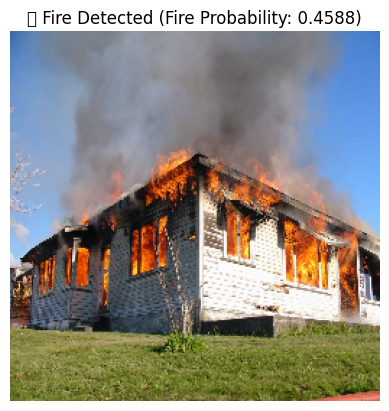

🎯 Final Prediction: 🔥 Fire Detected (Fire Probability: 0.4588)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Constants
IMG_SIZE = 256
model_path = r'C:\Users\Abdul Raqeeb\major_p\frontend rafi\firelp.keras'
img_path = r"C:\Users\Abdul Raqeeb\major_p\frontend rafi\Fire-Detection-images\1\16.jpg"

# Load model
model = load_model(model_path)
print("✅ Model loaded successfully.")

# Read and process the image
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
if img is None:
    print("❌ Error: Image not found.")
    exit()

# Resize and normalize
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
img_array = np.expand_dims(img_rgb / 255.0, axis=0)  # Normalize

# Predict
prediction = model.predict(img_array)
print("🔍 Raw prediction output:", prediction)

# Determine fire probability
if prediction.shape[1] == 1:
    fire_prob = prediction[0][0]
else:
    fire_prob = prediction[0][1]

# Label based on fire probability
if fire_prob >= 0.35:
    label = "🔥 Fire Detected"
else:
    label = "No Fire"

# Show result
plt.imshow(img_rgb)
plt.title(f"{label} (Fire Probability: {fire_prob:.4f})", fontsize=12)
plt.axis("off")
plt.show()

# Final log
print(f"🎯 Final Prediction: {label} (Fire Probability: {fire_prob:.4f})")
